# Applied Computational Intelligence - HW1

Authors
- Brewton Morais
- Lucas Abdalah

The goal is to get a good insight into a dataset by mean of summary statistics and visualisations. For this exercise we choose a Kaggle Breast Cancer Datase, available [here](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset).

## 0. Packages and General Options

In [151]:
# Packages and Data Import
from tkinter import OFF
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import zscore, norm

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

pd.set_option('display.max_columns', 1000)  # or 1000
pd.set_option('display.max_rows', 1000)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

sns.set_palette('bright')

# Importing a dataframe 
df = pd.read_csv(r"https://raw.githubusercontent.com/lucasabdalah/Exploratory-Data-Analisys/hw1-report/code/hw1/breast-cancer.csv")

## 1. Describe your data 

1. Their features in terms of number of observations $N$
2. Number of predictor variables $D$
3. Number of classes $L$
4. Class-distribution (that is, the number of observations for each of the classes)

In [152]:
# Check if tha data is ok
df.tail(5) # Last 5 rows of a dataframe

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


1.1 - 1.4

In [153]:
print("N = {} Observations\n".format(len(df.axes[0])))
print("D = {} Predictor variables\n".format(len(df.columns)))
print("Predictor Names:\n{}\n".format(df.columns.to_list()))
print("Class-Distribution:\n{}".format(df["diagnosis"].value_counts()))

N = 569 Observations

D = 32 Predictor variables

Predictor Names:
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

Class-Distribution:
B    357
M    212
Name: diagnosis, dtype: int64


In [154]:
df = df.drop('id', axis = 1) # Let the data anonymous and delete the id (meaningless)
numeric_columns = df.select_dtypes(include=[np.number]).columns # retrieving only numerical columns from dataframe 

In [155]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [156]:
# Checking if there are missing values 
df.isnull() is True

False

## 2. Perform an unconditional mono-variate analysis 

1. Plot their (unconditional) histogram, 
2. Calculate their (unconditional) mean $(\mu_d)$, standard deviation $(\sigma_d)$ and skewness $(\gamma_d)$ of each of the D predictors (means, standard deviations and skewness)

2.1

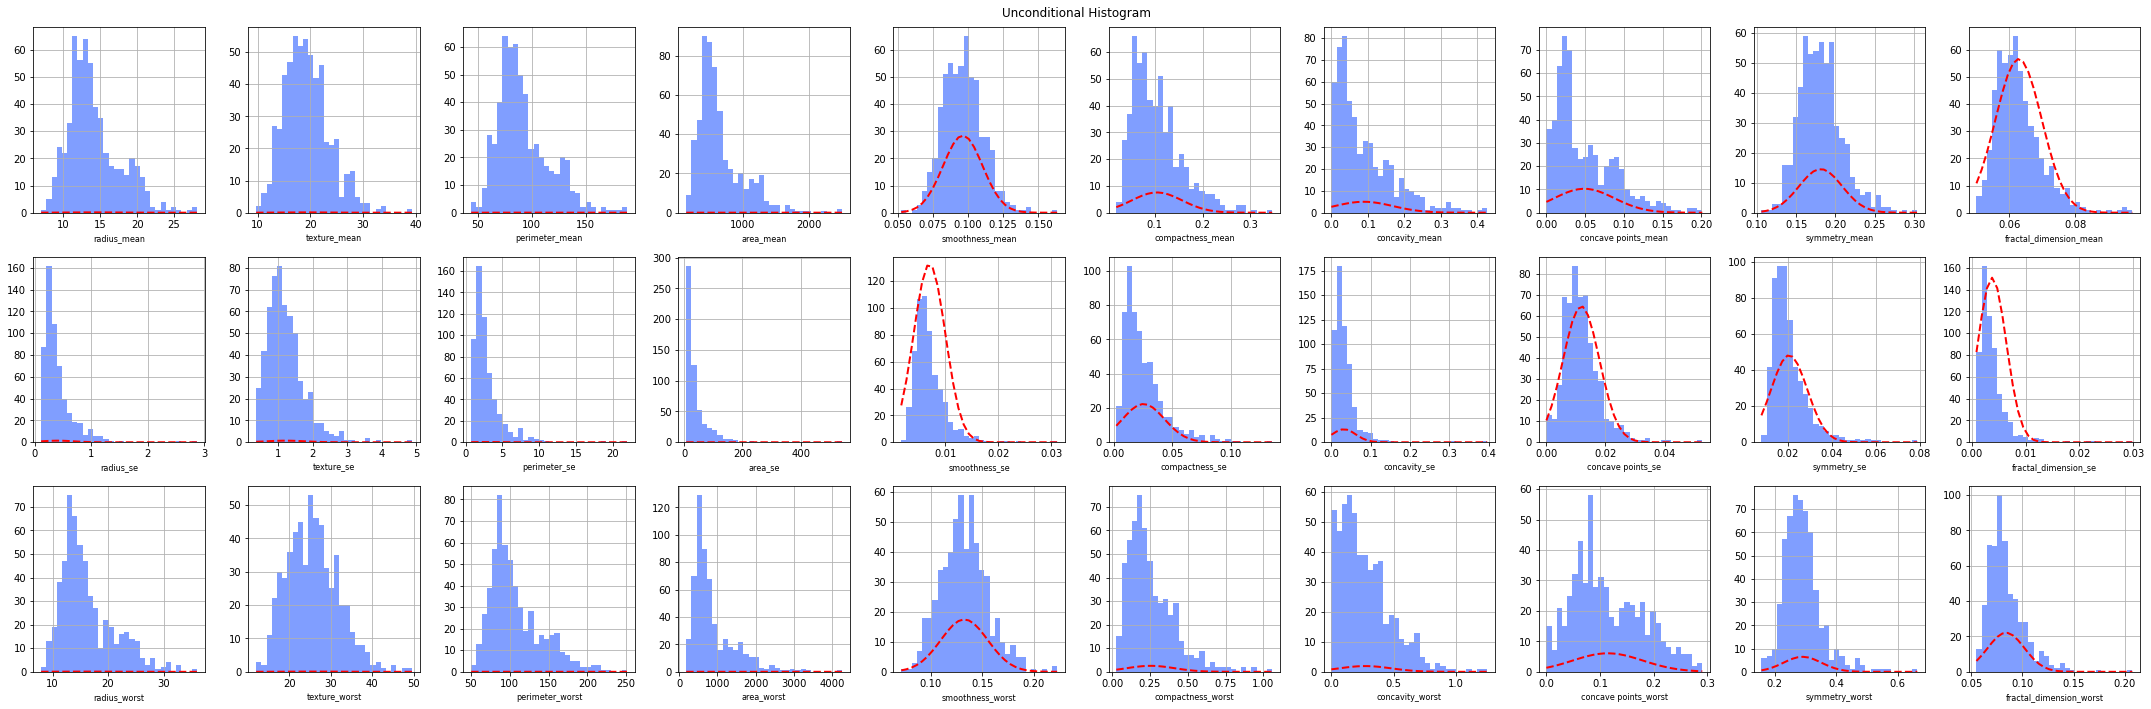

In [157]:
n_of = {"rows": 3, "cols": 10};

fig1, axes1 = plt.subplots(n_of["rows"], n_of["cols"], figsize=(30,10));

i = 0
for ii in range(n_of["rows"]):
        for jj in range(n_of["cols"]):
                # Plot Histogram
                ax = axes1[ii]
                _, bins, _ = ax[jj].hist(df[numeric_columns[i]], bins = 30, alpha = 0.5)
                ax[jj].grid('on')
                ax[jj].set_xlabel(numeric_columns[i], fontsize = 8)           
                # Plot Normal - Best Fit Line
                mu, sigma = norm.fit(df[numeric_columns[i]])
                best_fit_line = norm.pdf(bins, mu, sigma)
                ax[jj].plot(bins, best_fit_line, 'r--', linewidth=2)
                
                i += 1

fig1.suptitle('Unconditional Histogram')
fig1.tight_layout()
# fig1.savefig(r"figures/2-1-unconditional-histogram.pdf")
# fig1.savefig(r"figures/2-1-unconditional-histogram.png")
plt.show()

2.2

In [158]:
df.describe() # retrieve descriptive statistics

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [159]:
print("Predictor Mean: \n{}\n".format(df.mean(axis = 0).to_dict()))
print("Predictor Standard Deviation: \n{}\n".format(df.std(axis = 0).to_dict()))
print("Predictor Skewness: \n{}\n".format(df.skew(axis = 0).to_dict()))

Predictor Mean: 
{'radius_mean': 14.127291739894563, 'texture_mean': 19.28964850615117, 'perimeter_mean': 91.96903339191566, 'area_mean': 654.8891036906857, 'smoothness_mean': 0.096360281195079, 'compactness_mean': 0.10434098418277686, 'concavity_mean': 0.08879931581722322, 'concave points_mean': 0.048919145869947236, 'symmetry_mean': 0.181161862917399, 'fractal_dimension_mean': 0.06279760984182778, 'radius_se': 0.4051720562390161, 'texture_se': 1.2168534270650269, 'perimeter_se': 2.8660592267135288, 'area_se': 40.33707908611603, 'smoothness_se': 0.007040978910369071, 'compactness_se': 0.025478138840070306, 'concavity_se': 0.031893716344463946, 'concave points_se': 0.011796137082601056, 'symmetry_se': 0.020542298769771532, 'fractal_dimension_se': 0.0037949038664323383, 'radius_worst': 16.269189806678394, 'texture_worst': 25.677223198594014, 'perimeter_worst': 107.2612126537786, 'area_worst': 880.5831282952545, 'smoothness_worst': 0.13236859402460469, 'compactness_worst': 0.254265043936

## 3. Perform a class-conditional mono-variate analysis of each of the predictors

1. Plot their (class-conditional) histogram
2. Calculate their (unconditional) mean $(\mu_{d|l})$, standard deviation $(\sigma_{d|l})$ and skewness $(\gamma_{d|l})$ of each of the D predictors (means, standard deviations and skewness)

3.1

Data Pre-Processing: Z-Score Normalization

In [168]:
# Data Preprocessing: apply z-score 
df_Zscore = df.copy()
df_Zscore[numeric_columns] = df_Zscore[numeric_columns].apply(zscore);
# Split dataset by class
df_Zscore_Benign = df_Zscore[df_Zscore['diagnosis']=='B'];
df_Zscore_Malignant = df_Zscore[df_Zscore['diagnosis']=='M'];

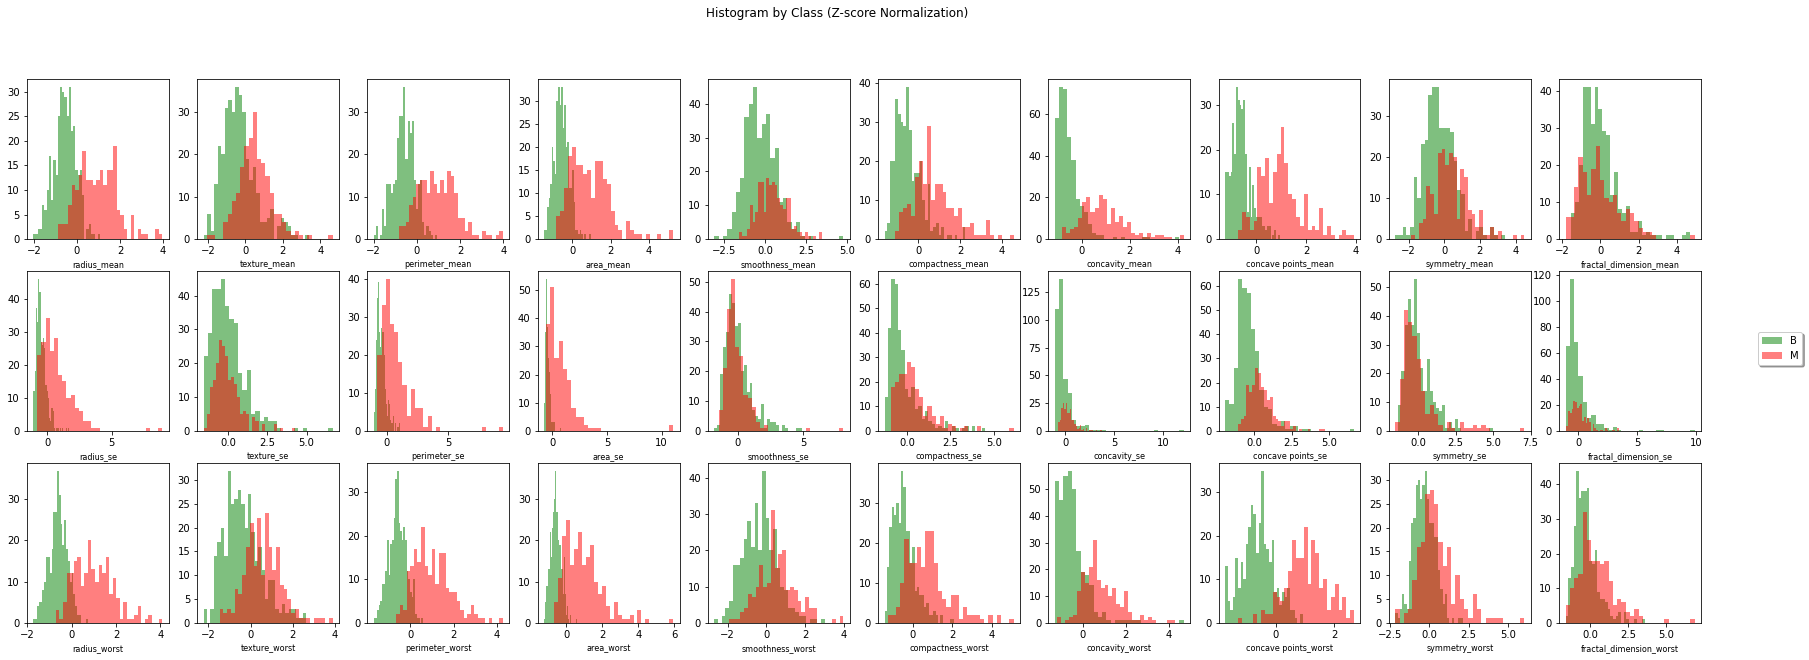

In [178]:
fig2, axes2 = plt.subplots(n_of["rows"], n_of["cols"], figsize=(30,10))

i = 0
for ii in range(n_of["rows"]):
        for jj in range(n_of["cols"]):
                # Histogram of Beningn and Malignant 
                ax = axes2[ii]
                ax[jj].hist(df_Zscore_Benign[numeric_columns[i]], bins = 30, color="green", alpha = 0.5, label = 'B')
                ax[jj].hist(df_Zscore_Malignant[numeric_columns[i]], bins = 30, color="red", alpha = 0.5, label = 'M')
                ax[jj].set_xlabel(numeric_columns[i], fontsize = 8)
                i += 1

fig2.suptitle('Histogram by Class (Z-score Normalization)')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.75, 1.85), frameon = True, shadow = True)
fig2.savefig(r"figures/3-1-conditional-histogram.pdf")
fig2.savefig(r"figures/3-1-conditional-histogram.png")
plt.show()

3.2

In [182]:
print("Mean\n")
print("- Benign: \n{}\n".format(df_Zscore_Benign.mean(axis = 0).to_dict()))
print("- Malignant: \n{}\n".format(df_Zscore_Malignant.mean(axis = 0).to_dict()))

print("Standard Deviation\n")
print("- Benign: \n{}\n".format(df_Zscore_Benign.std(axis = 0).to_dict()))
print("- Malignant: \n{}\n".format(df_Zscore_Malignant.std(axis = 0).to_dict()))

print("Skewness\n")
print("- Benign: \n{}\n".format(df_Zscore_Benign.skew(axis = 0).to_dict()))
print("- Malignant: \n{}\n".format(df_Zscore_Malignant.skew(axis = 0).to_dict()))

Mean

- Benign: 
{'radius_mean': -0.5625662115112122, 'texture_mean': -0.3199453412702914, 'perimeter_mean': -0.572281287623049, 'area_mean': -0.5463490052176833, 'smoothness_mean': -0.2763093742433902, 'compactness_mean': -0.4596939513531881, 'concavity_mean': -0.5366207431743413, 'concave points_mean': -0.5984652639994948, 'symmetry_mean': -0.2546850111800504, 'fractal_dimension_mean': 0.009892766381598653, 'radius_se': -0.43703817046831916, 'texture_se': 0.0063986193706725685, 'perimeter_se': -0.42856678023048056, 'area_se': -0.4224753021705948, 'smoothness_se': 0.05164311063860298, 'compactness_se': -0.225787722320827, 'concavity_se': -0.19552632667253503, 'concave points_se': -0.31444090973929467, 'symmetry_se': 0.005025720825120726, 'fractal_dimension_se': -0.060086211387773585, 'radius_worst': -0.5983419192968013, 'texture_worst': -0.352093219999986, 'perimeter_worst': -0.6033203268439074, 'area_worst': -0.5654918450100106, 'smoothness_worst': -0.32478442482814657, 'compactness_

## 4. Perform an unconditional bi-variate analysis of the predictors

## 5. Perform an unconditional multi-variate analysis of the predictors

### Data Analysis 

1. The data consists of 569 observations of 31 parameters of potential cancer cells. Which ones are more relevant for the final prediction? 
2. Let's plot some histograms, free of class dependecy, of the data. Then we do it with class dependency (wheter it has influence on diagnosis or not). 

In [68]:
# Get a general description of the data by diagnosis
df.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [69]:
numeric_columns = df.select_dtypes(include=[np.number]).columns # retrieving only numerical columns from dataframe 
df_zscore = df[numeric_columns].apply(zscore)

In [70]:
df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [31]:
df_zscore.head(2)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.236405,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.236403,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190


- - -

#### Scatter Plot (Bivariate Analysis)

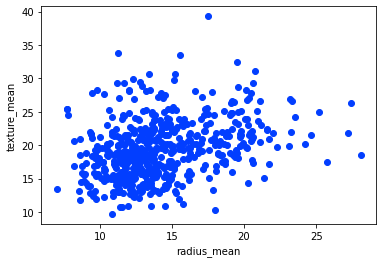

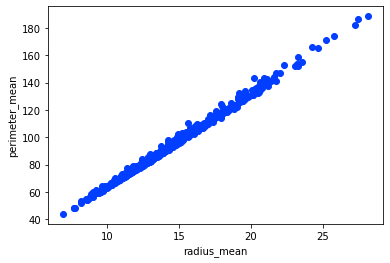

In [8]:


plt.figure()
plt.scatter(df["radius_mean"].to_numpy(), df["texture_mean"].to_numpy())
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")

plt.figure()
plt.scatter(df["radius_mean"].to_numpy(), df["perimeter_mean"].to_numpy())
plt.xlabel("radius_mean")
plt.ylabel("perimeter_mean")
plt.show()

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number]).columns # retrieving only numerical columns from dataframe 
df = df[numeric_columns].apply(zscore)

### Z-Score Normalization

### HeatMap

### PCA